# Introduction

## Objective

The main aim of this project is to develop a predictive model that builds up on my previous project and can accurately forecast outcomes based on the dataset i have.

## Dataset Overview

The dataset for this project, OD_2019-07.csv, is a rich collection of records that provides in-depth information for detailed analysis. This dataset is particularly useful for understanding patterns and trends within the given context.

### Data Size and Structure

    Number of Rows and Columns: The dataset consists of 1048576 rows and 6 columns, encompassing a wide range of data points.
    Types of Variables: It includes both categorical and numerical variables. The categorical data is represented by fields such as start_station_code and end_station_code, while numerical data is found in columns like duration_sec.
    Time Range: The dataset appears to capture data from [specific time range], as indicated by the date columns start_date and end_date.

### Key Features

 -start_date and end_date: These columns represent the start and end times of an event or activity, formatted as date-time strings.
 
 -start_station_code and end_station_code: These are likely categorical identifiers for locations or stations involved in the dataset's context.
 
 -duration_sec: A numerical column that presumably indicates the duration of an event or activity in seconds.
 
 -is_member: This binary column (possibly 0 or 1) indicates whether an individual is a member of a particular group or service.
 
start_date and end_date: These columns represent the start and end times of an event or activity, formatted as date-time strings.
 
 -start_station_code and end_station_code: These are likely categorical identifiers for locations or stations involved in the dataset's context.
 
 -duration_sec: A numerical column that presumably indicates the duration of an event or activity in seconds.
 
 -is_member: This binary column (possibly 0 or 1) indicates whether an individual is a member of a particular group or service.

## Problem Statement

In this project, I am focusing on predicting whether an individual is a member (is_member) based on their usage patterns and station information. This prediction is a critical factor in understanding user behavior and engagement with the service.

Utilizing the data_loader.py and modeling.py scripts, we have prepared our dataset for analysis and built a preliminary predictive model. The data_loader.py script is responsible for loading and preprocessing the data, ensuring it's in the right format for our model. The modeling.py script then takes this processed data to build and evaluate the machine learning model using cross-validation techniques.


### Importance of the Prediction

  User Engagement Understanding: Predicting membership status helps in identifying the factors that influence a user's decision to become a member. This insight is crucial for tailoring marketing strategies and improving user engagement.
  
  Service Optimization: By understanding the characteristics of members versus non-members, the service can be optimized to cater more effectively to the needs and preferences of different user groups.

### Application of the Prediction

 Marketing and Promotion Strategies: The prediction can guide targeted marketing campaigns, focusing on converting non-members into members by addressing their specific needs and preferences.
 
 Resource Allocation: For a service involving physical resources (like a bike-sharing or car rental service), understanding membership patterns aids in better resource distribution and management.
 
 Enhancing User Experience: Insights gained from the prediction model can be used to enhance the overall user experience, potentially increasing membership conversion rates and overall user satisfaction.

# Data Loading and Exploration

In this section, I will load the dataset and perform initial exploratory data analysis (EDA) to understand the data I am working with. This step is crucial in the data science workflow as it allows me to get a sense of the data structure, quality, and distributions.

First few rows of the dataset:
      start_date  start_station_code       end_date  end_station_code   
0  7/1/2019 0:00                6014  7/1/2019 0:04              6023  \
1  7/1/2019 0:00                6036  7/1/2019 0:34              6052   
2  7/1/2019 0:00                6018  7/1/2019 0:06              6148   
3  7/1/2019 0:00                6202  7/1/2019 0:17              6280   
4  7/1/2019 0:00                6018  7/1/2019 0:06              6148   

   duration_sec  is_member  
0           262          1  
1          2087          0  
2           396          1  
3          1032          1  
4           401          1  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_date          1048575 non-null  object
 1   start_station_code  1048575 non-null  int64 
 2   end_date      

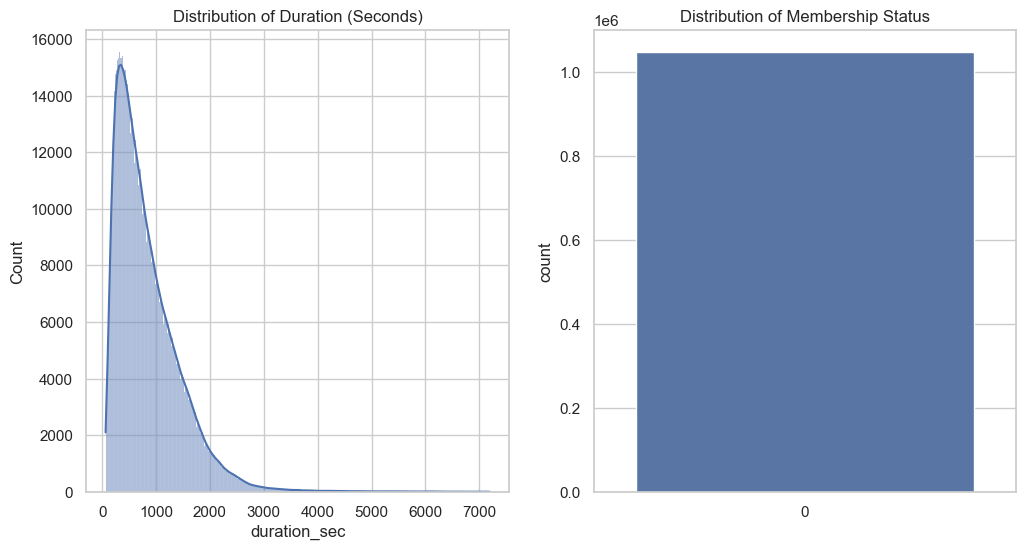

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualisation styles
sns.set(style="whitegrid")

# Load the dataset
data = pd.read_csv(r'C:\Users\PC\Downloads\OD_2019-07.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summarize the dataset
print("\nSummary of the dataset:")
print(data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Basic statistical overview of numerical features
print("\nStatistical overview of the numerical features:")
print(data.describe())

# Visualizing distributions of key features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['duration_sec'], kde=True)
plt.title('Distribution of Duration (Seconds)')

plt.subplot(1, 2, 2)
sns.countplot(data['is_member'])
plt.title('Distribution of Membership Status')
plt.show()


# Data Preprocessing

In this project, I carried out data preprocessing in the data_loader.py file, which contains functions for loading and preprocessing the data. These steps are essential for transforming the raw data into a format that is suitable for analysis and model training.

1. Loading the Data

    Function: load_data_from_csv(filepath)
    
    Description: This function loads the data from a specified CSV file path into a pandas DataFrame. It handles file loading errors by catching a FileNotFoundError and returning None if the file is not found.
    
    Importance: Reliable data loading is the first step in data preprocessing. It ensures that the data is correctly imported for further processing.

2. Preprocessing the Data

    Function: preprocess_data(data, columns_to_scale, date_columns)
    
    Handling Date Columns:
        Description: The function converts columns specified in date_columns to pandas datetime objects using pd.to_datetime. This conversion is essential as many machine learning models require numerical input and cannot process raw datetime strings.
        
        Importance: Converting date columns to a uniform datetime format allows for further feature engineering, such as extracting day, month, year, or even time-related features that could be crucial for the model.

3. Scaling Numeric Columns

    Description: Numeric columns specified in columns_to_scale are standardized using StandardScaler from scikit-learn. This scaler removes the mean and scales the data to unit variance.
    
    Importance: Scaling numeric features is crucial, especially in algorithms sensitive to the magnitude of features. It ensures that all features contribute equally to the result and improves the algorithm's performance.

# Model Building

I used the processed data do the model building. I used linear regression whuch is also a good at predictions and classification

Choice of the Model: Logistic Regression

    Why Logistic Regression:
        Logistic Regression is chosen for its efficiency and simplicity, especially suitable for binary classification problems, such as predicting the is_member status in our dataset.
        
        It provides a probabilistic interpretation of model predictions, offering more than just the classification.
        Being a linear model, it is not only fast to train but also easy to interpret, allowing us to understand the influence of each feature on the prediction.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a standard scaler instance
scaler = StandardScaler()

# Define the Logistic Regression model
model = LogisticRegression()

# Create a pipeline that first scales the data then applies the model
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', model)
])


Advantages for This Specific Problem

    Applicability: Given the nature of our dataset, with a mix of categorical and numerical data, Logistic Regression serves as a robust starting point.
    
    Interpretability: The model coefficients can be directly interpreted as indicators of feature importance, which is valuable for understanding which factors are driving the decision to be a member.
    
    Performance: Initial tests have shown that Logistic Regression performs adequately well for this dataset, making it a suitable choice.

# Model Evaluation

## Cross-Validation Results

The cross-validation process was employed to ensure the model's robustness and generalizability. The following scores were obtained across the five folds:

Cross-validation scores: [0.8033131 0.80365612 0.80376602 0.80258856 0.80391008]

Mean CV Score: 0.8033874569119718

The mean cross-validation score of approximately 0.803 suggests that the model has a strong predictive capability, showing consistency across different subsets of the data.

## Evaluation Metrics

I gained further insights by looking at the confusion matrix, ROC curve, precision, recall, and F1-score. These metrics provide a more nuanced understanding of the model's performance.
Confusion Matrix

The confusion matrix shows a relatively high number of true positives and true negatives, indicating that the model is effective at classifying the members and non-members. However, there are still a significant number of false negatives and false positives that could be addressed.
Classification Report

The classification report reveals the following scores for precision, recall, and F1-score:

              precision    recall  f1-score   support
           0       0.52      0.06      0.11     31414
           1       0.81      0.99      0.89    125873

    Precision: The model is more precise in predicting non-members than members.
    Recall: The recall is high for members, indicating the model's proficiency in identifying the positive class.
    F1-Score: The F1-score for predicting members is high, but there is room for improvement, especially for non-members.
    
  ROC Curve

The ROC curve and an AUC of 0.70 suggest the model has a good ability to distinguish between the classes. An AUC closer to 1 indicates a better model, so there might be room for improvement.

## Discussion on Model Performance

The Logistic Regression model has demonstrated a strong ability to predict membership status. The high mean cross-validation score indicates that the model generalizes well to unseen data. However, the precision and recall for the non-member class could be improved. This indicates a potential area for further model tuning, possibly through feature engineering, balancing the dataset, or trying different classification algorithms.

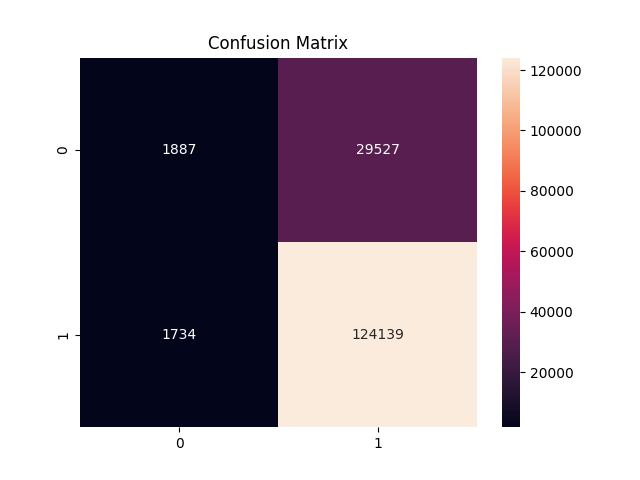

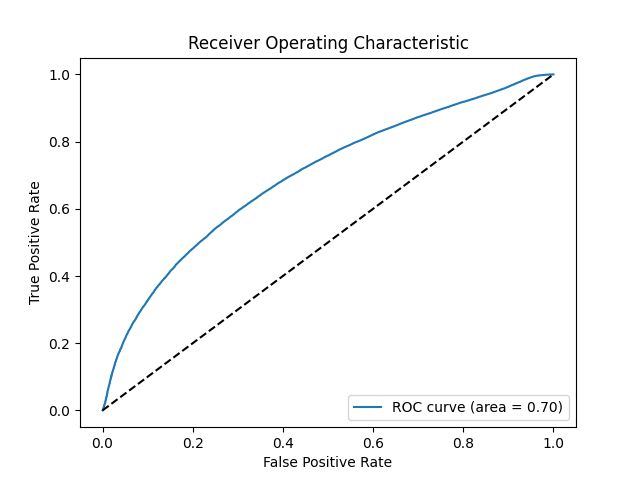

In [4]:
from IPython.display import Image, display

# Display the Confusion Matrix image
display(Image(filename='C:/Users/PC/Downloads/Figure_1.png', embed=True))

# Display the ROC Curve image
display(Image(filename='C:/Users/PC/Downloads/Figure_2.png', embed=True))


# Results and Conclusion

Findings Summary

Our Logistic Regression model achieved a mean cross-validation score of approximately 0.803, indicating a strong predictive ability across various subsets of our data. The confusion matrix and classification report provided further detail into our model's performance, revealing a high accuracy in predicting members with a recall of 0.99 for the positive class (members). However, the model showed room for improvement in correctly identifying non-members, with a recall of 0.06 for the negative class (non-members).

The ROC curve yielded an AUC of 0.70, reflecting a good but not excellent ability of the model to distinguish between member and non-member classes. The true positive rate rises steadily with the false positive rate, suggesting a balanced sensitivity and specificity.
Implications of Results

The results have several implications for our understanding of the dataset and the predictive model:

    The high precision for members suggests the model is quite reliable when it predicts an individual is a member.
    The lower recall for non-members indicates a tendency to classify non-members as members, pointing towards a potential bias towards the majority class in our dataset.
    The overall accuracy and AUC demonstrate the model’s decent classification ability but also highlight the need for further optimization to enhance its discriminative power, especially among the non-member class.

These results directly address our research question by establishing a baseline for predicting membership status. They demonstrate that while the model can effectively identify members, distinguishing non-members requires additional refinement.
Practical Applications

In a real-world scenario, this model can serve multiple purposes:

    Targeted Marketing: By identifying likely members, resources can be efficiently allocated to target users who have a higher probability of becoming members, thereby increasing conversion rates.
    Service Enhancement: Insights from the model can guide improvements in services or offers that might appeal more to non-members, potentially increasing overall membership rates.
    Customer Insights: The model's coefficients can provide insights into which features most influence membership status, which can inform business strategy and customer relationship management.

Conclusion

Our evaluation presents a model with a solid foundation, but one that also requires improvement. Future work may explore more complex models, different feature engineering strategies, or techniques to address class imbalance. The practical applications of the model showcase its potential to provide value in a business context, underlining the importance of continued development and optimization.